<a href="https://colab.research.google.com/github/alka62/ds_Alka_Kushwaha/blob/main/Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📂 Upload fear_greed_index.csv


Saving fear_greed_index.csv to fear_greed_index.csv
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB
None

First 5 rows:
    timestamp  value classification       date
0  1517463000     30           Fear 2018-02-01
1  1517549400     15   Extreme Fear 2018-02-02
2  1517635800     40           Fear 2018-02-03
3  1517722200     24   Extreme Fear 2018-02-04
4  1517808600     11   Extreme Fear 2018-02-05


/tmp/ipython-input-2731197072.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sentiment_df, x='classification', palette='viridis') # Corrected column name


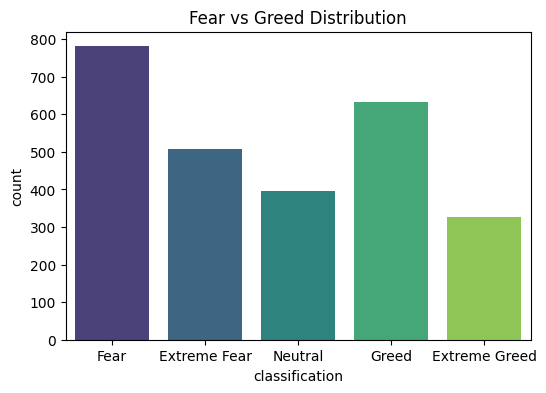

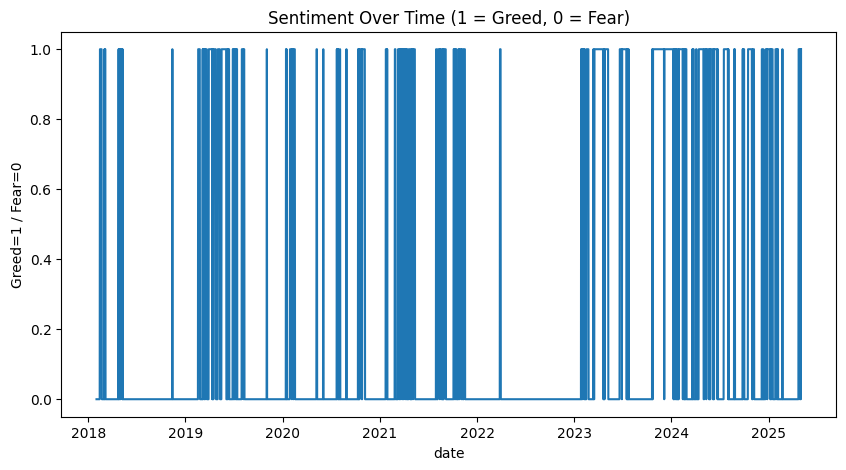


Longest streaks:
classification
Extreme Fear     74
Extreme Greed    77
Fear             48
Greed            42
Neutral          28
Name: length, dtype: int64


In [5]:
# ============================================
# Notebook 1 - Bitcoin Market Sentiment EDA
# ============================================

# ==== STEP 1: Upload datasets ====
from google.colab import files
import os

os.makedirs("csv_files", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

print("📂 Upload fear_greed_index.csv")
uploaded = files.upload()
for fn in uploaded.keys():
    os.rename(fn, f"csv_files/fear_greed_index.csv")

    # ==== STEP 2: Import libraries ====
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    # ==== STEP 3: Load dataset ====
    sentiment_df = pd.read_csv("csv_files/fear_greed_index.csv")
    sentiment_df['date'] = pd.to_datetime(sentiment_df['date']) # Corrected column name

    print("Dataset info:")
    print(sentiment_df.info())
    print("\nFirst 5 rows:")
    print(sentiment_df.head())

    # ==== STEP 4: Sentiment distribution ====
    plt.figure(figsize=(6,4))
    sns.countplot(data=sentiment_df, x='classification', palette='viridis') # Corrected column name
    plt.title("Fear vs Greed Distribution")
    plt.savefig("outputs/sentiment_distribution.png", dpi=300)
    plt.show()

    # ==== STEP 5: Sentiment over time ====
    plt.figure(figsize=(10,5))
    sns.lineplot(data=sentiment_df, x='date', # Corrected column name
                 y=sentiment_df['classification'].apply(lambda x: 1 if x.lower()=="greed" else 0)) # Corrected column name
    plt.title("Sentiment Over Time (1 = Greed, 0 = Fear)")
    plt.ylabel("Greed=1 / Fear=0")
    plt.savefig("outputs/sentiment_over_time.png", dpi=300)
    plt.show()

    # ==== STEP 6: Longest streaks ====
    sentiment_df['streak_group'] = (sentiment_df['classification'] != sentiment_df['classification'].shift()).cumsum() # Corrected column name
    streak_lengths = sentiment_df.groupby(['streak_group','classification']).size().reset_index(name='length') # Corrected column name
    longest_streaks = streak_lengths.groupby('classification')['length'].max() # Corrected column name

    print("\nLongest streaks:")
    print(longest_streaks)

    # Save streak data
    longest_streaks.to_csv("outputs/longest_streaks.csv", index=True)